In [47]:
# Bagged Decision Trees for Classification
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import preprocessing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data (1).csv to Company_Data (1).csv


In [ ]:
company=pd.read_csv('Company_Data (1).csv')

In [ ]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# **EDA**

In [ ]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
company.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [ ]:
company[company.duplicated()] #no duplicate values

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [ ]:
company.info() #400 rows, 11 columns and no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [ ]:
company.corr()

<ipython-input-10-8edeb1dd07af>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  company.corr()


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


# **Feature Engineering**

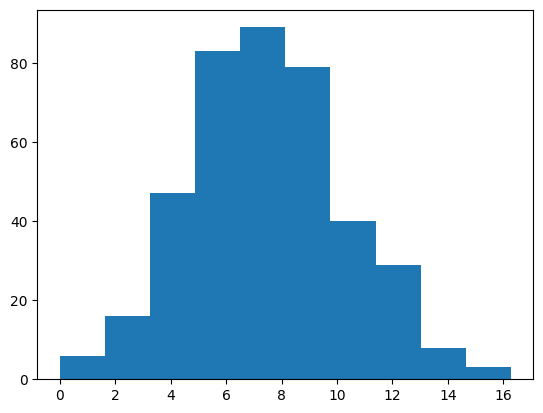

In [ ]:
plt.hist('Sales',data= company)
plt.show()

As the Sales distribution is not skewed and it is normal distribution we can take mean or median as a threshold to make two categories 'Low' and 'High' Sales

In [ ]:
sale_val = []
for value in company['Sales']:
    if value <= 7.49:
        sale_val.append("low")
    else:
        sale_val.append("high")

company["sale_val"]= sale_val

In [ ]:
company['sale_val'].value_counts()

low     201
high    199
Name: sale_val, dtype: int64

In [ ]:
company.info() #12 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
 11  sale_val     400 non-null    object 
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [ ]:
numerical_features = company.describe(include=["int64", "float64"]).columns
numerical_features

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

In [ ]:
categorical_features = company.describe(include=["object"]).columns
categorical_features

Index(['ShelveLoc', 'Urban', 'US', 'sale_val'], dtype='object')

# **Visualization**

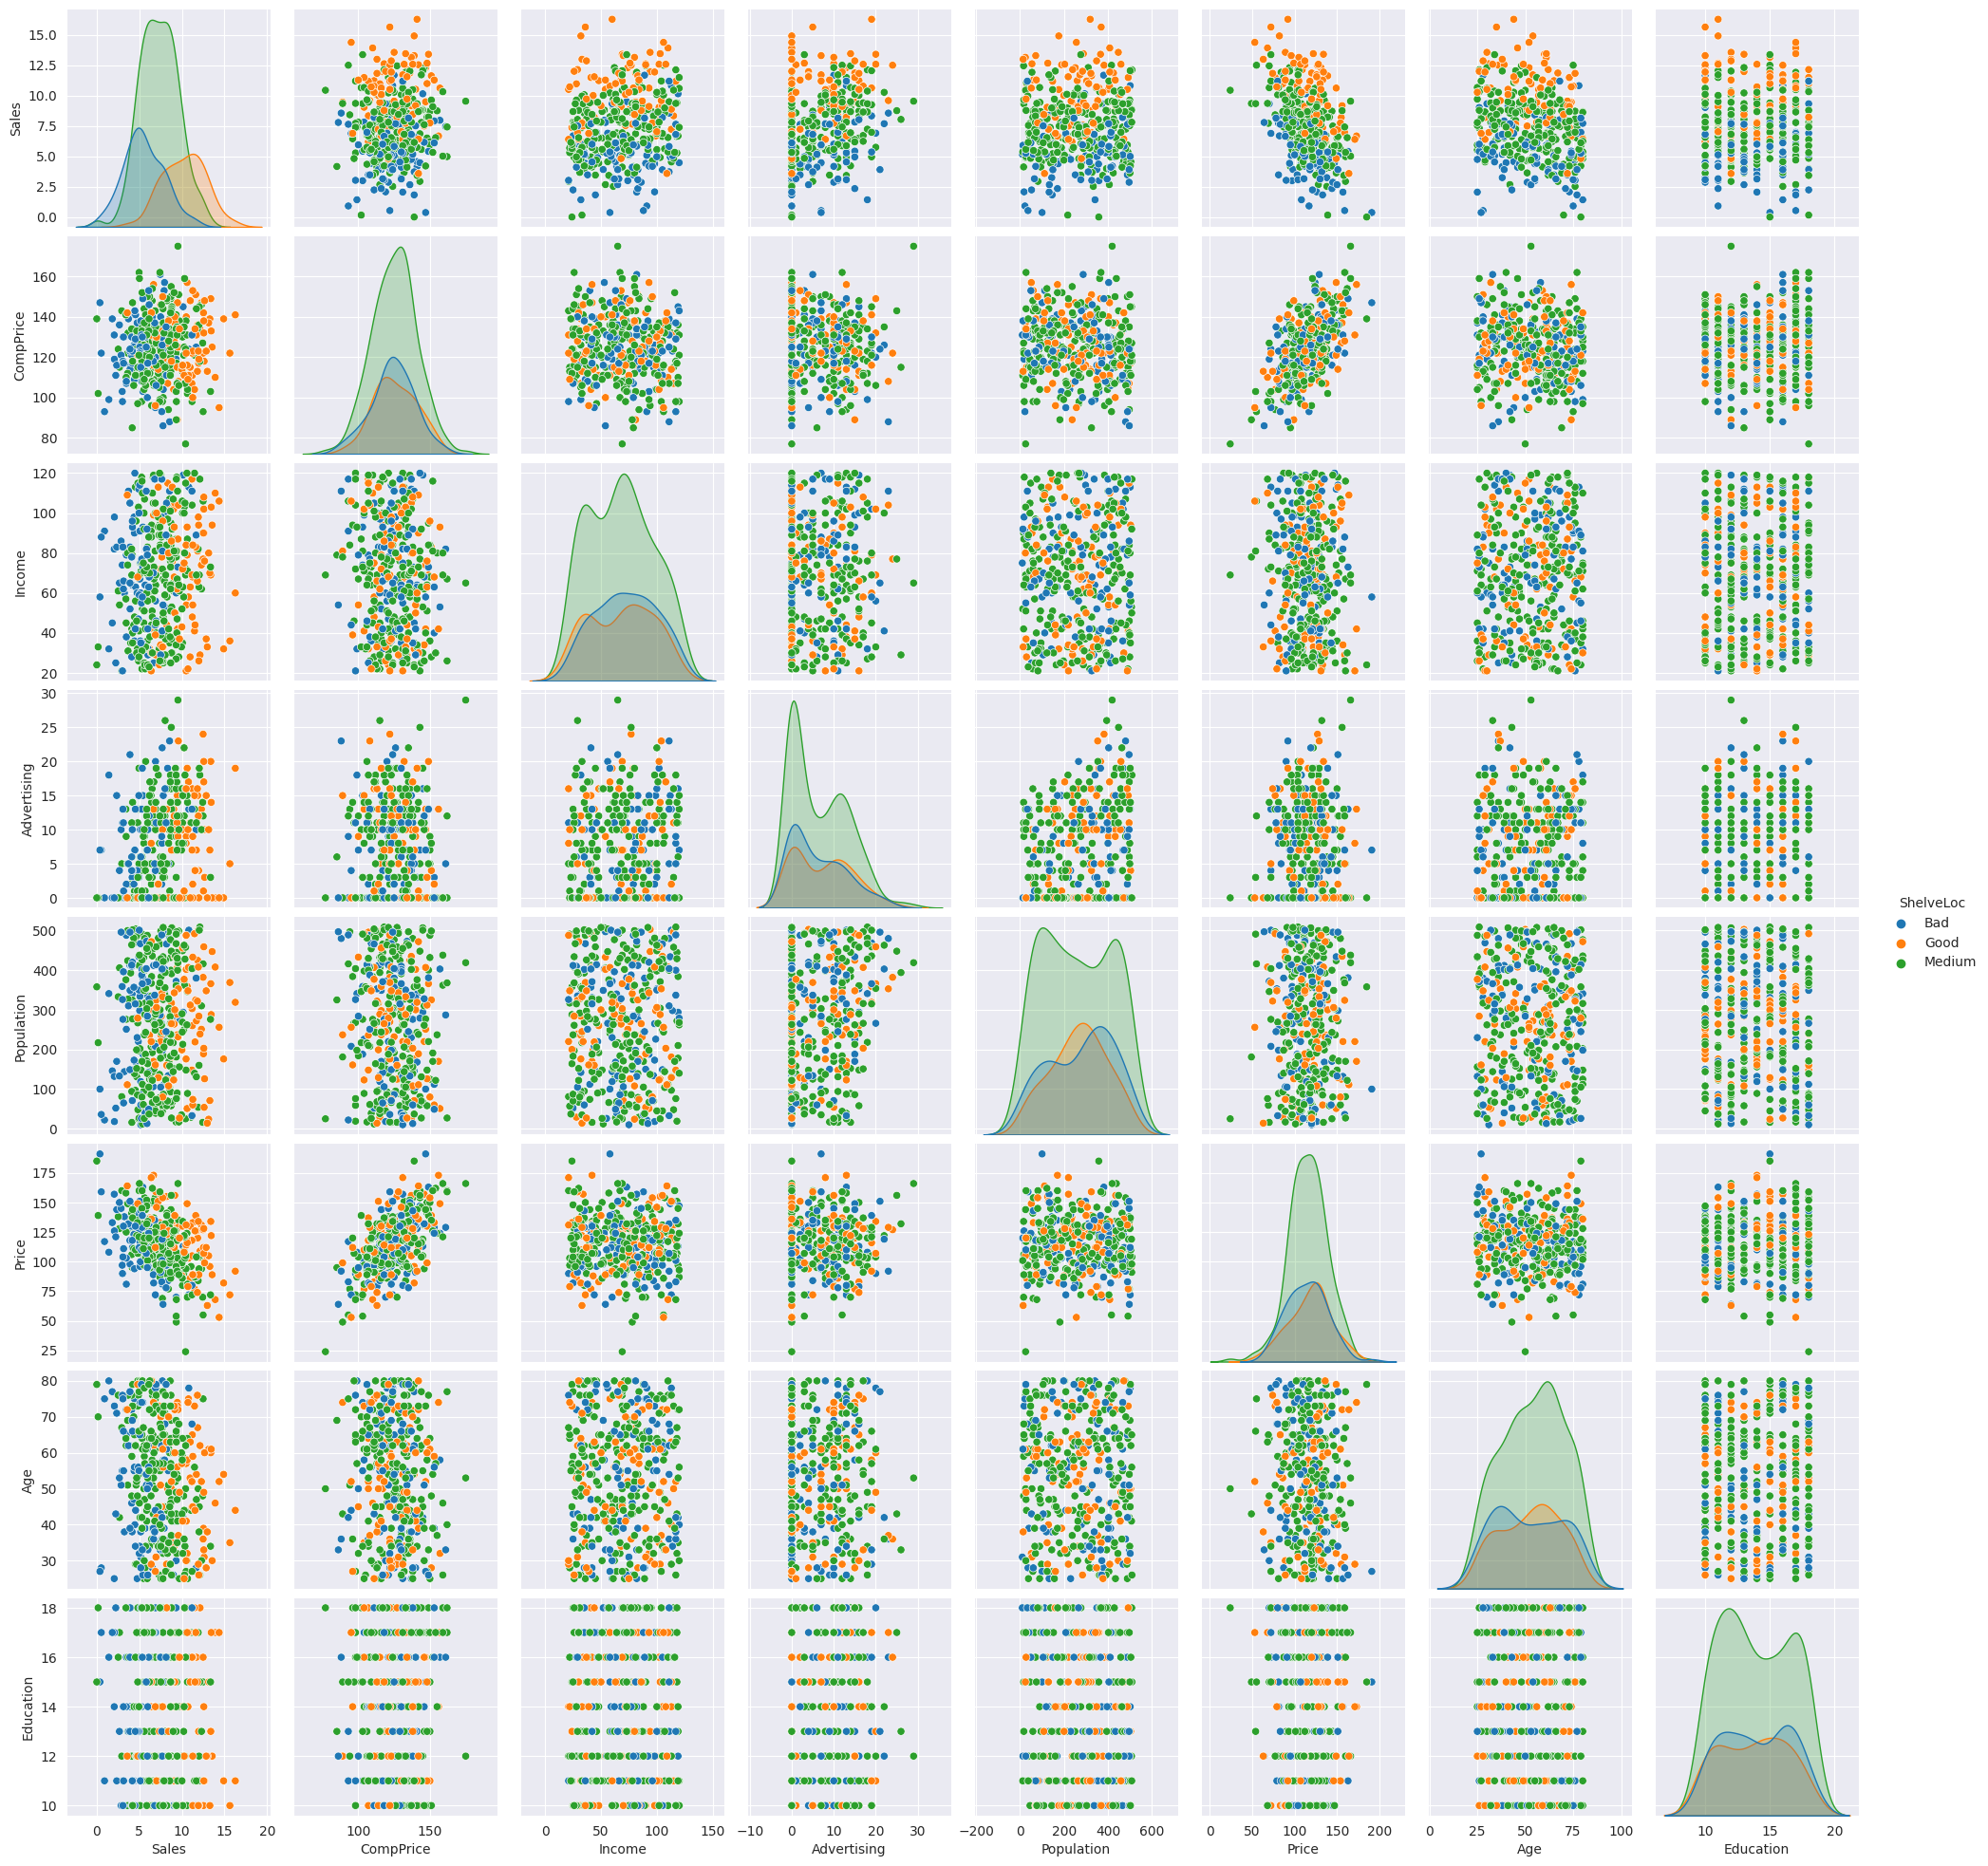

In [ ]:
sns.set_style(style = 'darkgrid')
sns.pairplot(company, hue = 'ShelveLoc')

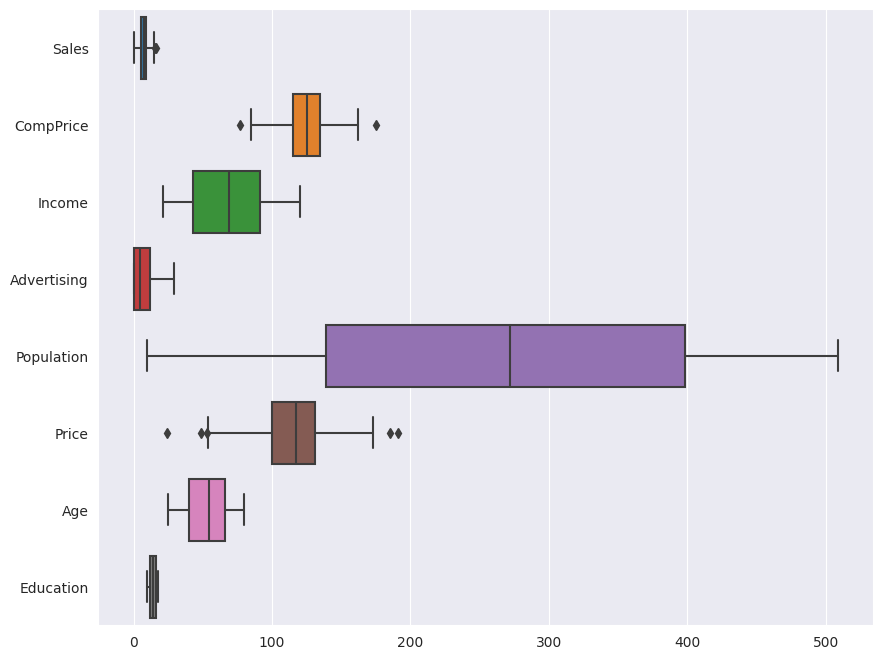

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(data= company[numerical_features], orient="h")
plt.show()

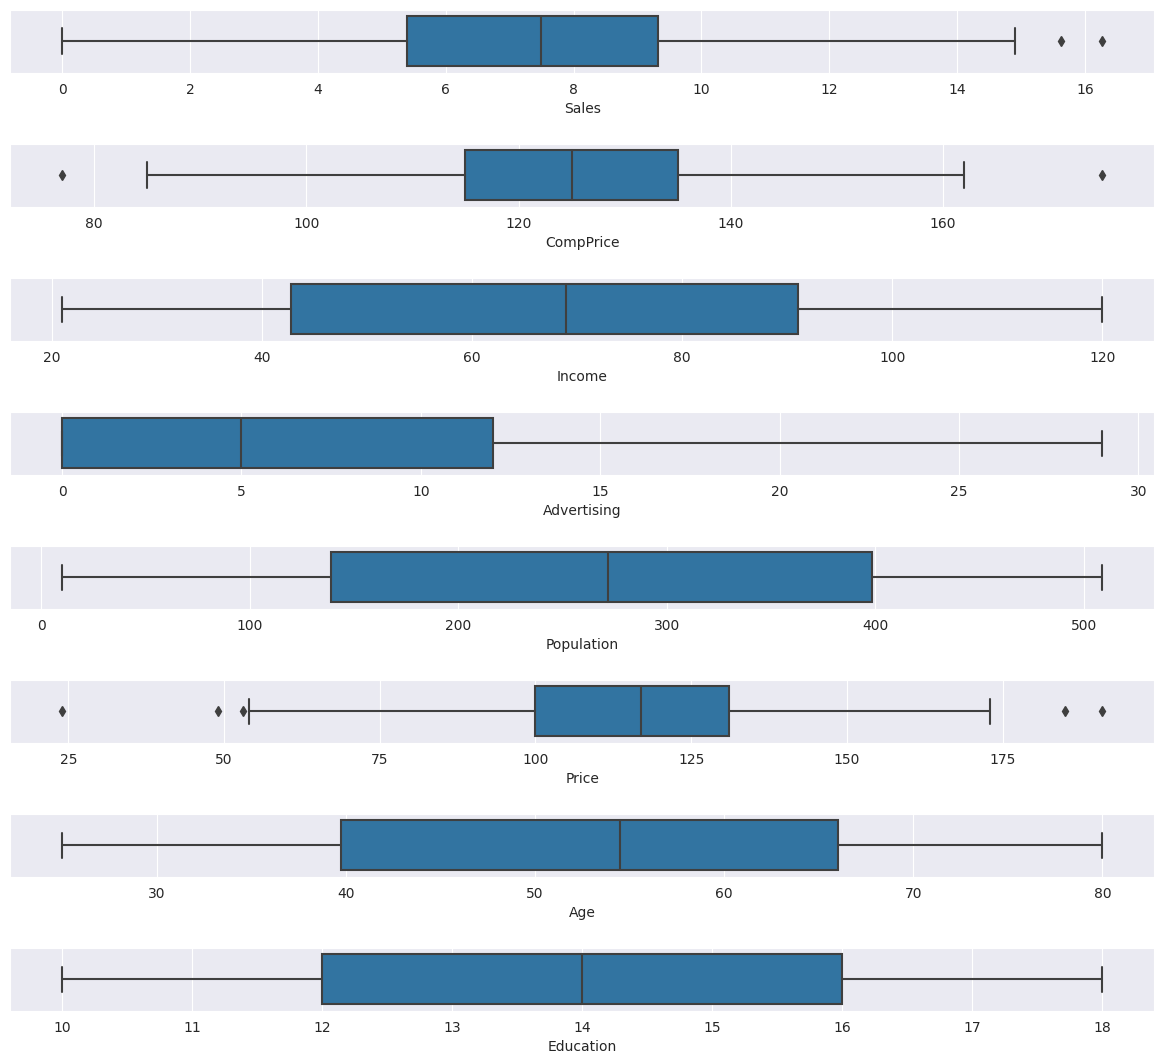

In [ ]:
outlier = company.copy()
fig, axes = plt.subplots(8,1,figsize=(12, 11))
sns.boxplot(x='Sales',data= outlier,ax=axes[0])
sns.boxplot(x='CompPrice',data= outlier,ax=axes[1])
sns.boxplot(x='Income',data= outlier,ax=axes[2])
sns.boxplot(x='Advertising',data= outlier,ax=axes[3])
sns.boxplot(x='Population',data= outlier,ax=axes[4])
sns.boxplot(x='Price',data= outlier,ax=axes[5])
sns.boxplot(x='Age',data= outlier,ax=axes[6])
sns.boxplot(x='Education',data= outlier,ax=axes[7])
plt.tight_layout(pad=2.0)

Population has a mean that is much superior to the other constituents

Index(['ShelveLoc', 'Urban', 'US', 'sale_val'], dtype='object')


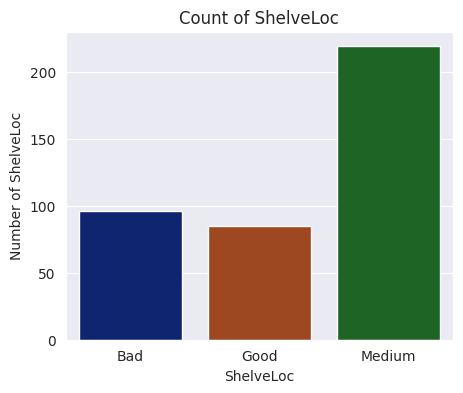

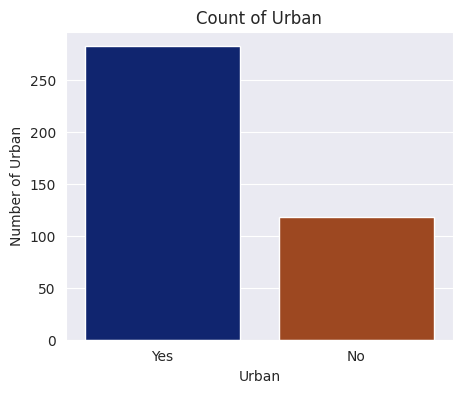

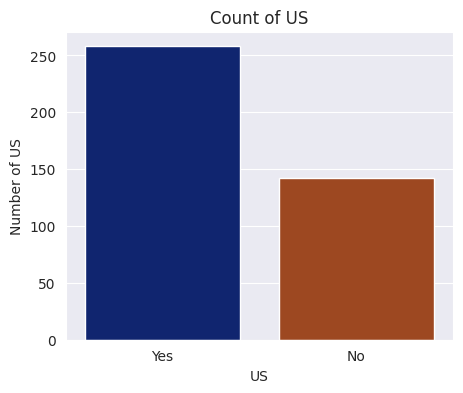

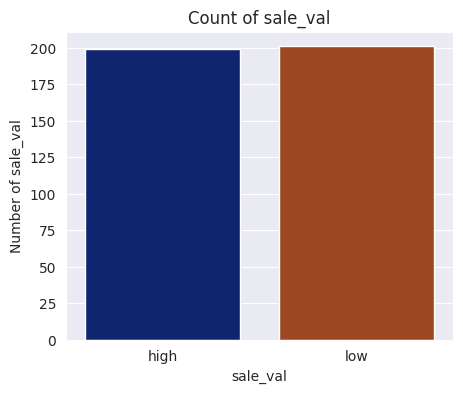

In [ ]:
print(categorical_features)

for idx, column in enumerate(categorical_features):
    plt.figure(figsize=(5,4))
    unique = company[column].value_counts(ascending=True);

    plt.title("Count of "+ column)
    sns.countplot(data= company, x=column,palette = "dark")
    plt.xticks(rotation = 0, size = 10)

    plt.xlabel(column, fontsize=10)
    plt.ylabel("Number of "+ column, fontsize=10)

In [ ]:
#categorical data is converted into numerical
label = preprocessing.LabelEncoder()
company['ShelveLoc'] = label.fit_transform(company['ShelveLoc'])
company['Urban'] = label.fit_transform(company['Urban'])
company['US'] = label.fit_transform(company['US'])

In [ ]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sale_val
0,9.50,138,73,11,276,120,0,42,17,1,1,high
1,11.22,111,48,16,260,83,1,65,10,1,1,high
2,10.06,113,35,10,269,80,2,59,12,1,1,high
3,7.40,117,100,4,466,97,2,55,14,1,1,low
4,4.15,141,64,3,340,128,0,38,13,1,0,low


In [ ]:
company['ShelveLoc'].value_counts() #Bad=0, Good=1, Medium=2

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [ ]:
company['Urban'].value_counts() #No=0, Yes=1

1    282
0    118
Name: Urban, dtype: int64

In [ ]:
company['US'].value_counts() #No=0, Yes=1

1    258
0    142
Name: US, dtype: int64

In [ ]:
data1 = company.drop(['Sales'], axis=1)

In [ ]:
data1.sample(5)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sale_val
397,162,26,12,368,159,2,40,18,1,1,low
160,111,28,0,486,111,2,29,12,0,0,low
322,140,50,10,300,139,1,60,15,1,1,high
84,111,25,0,52,121,0,43,18,0,0,low
68,149,69,20,366,134,1,60,13,1,1,high


In [ ]:
#defining independent and dependent varibales
x = data1.iloc[:, 0:10] #independet variable
y = data1['sale_val'] #dependent variable

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (268, 10)
Shape of x_test:  (132, 10)
Shape of y_train:  (268,)
Shape of y_test:  (132,)


# **Bagging**

# **Randomized Search CV**

In [ ]:
classifier = BaggingClassifier()
param_grid=[{'n_estimators':[100, 200, 150],'random_state':[7, 10, 9]}]
#n_estimators=number of trees
gsv=RandomizedSearchCV(classifier,param_grid, cv=10, verbose=300) #verbose controls output
#cv=10 means 10 folds
gsv.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10; 1/9] START n_estimators=100, random_state=7...........................
[CV 1/10; 1/9] END n_estimators=100, random_state=7;, score=0.815 total time=   0.2s
[CV 2/10; 1/9] START n_estimators=100, random_state=7...........................
[CV 2/10; 1/9] END n_estimators=100, random_state=7;, score=0.630 total time=   0.2s
[CV 3/10; 1/9] START n_estimators=100, random_state=7...........................
[CV 3/10; 1/9] END n_estimators=100, random_state=7;, score=0.741 total time=   0.3s
[CV 4/10; 1/9] START n_estimators=100, random_state=7...........................
[CV 4/10; 1/9] END n_estimators=100, random_state=7;, score=0.667 total time=   0.2s
[CV 5/10; 1/9] START n_estimators=100, random_state=7...........................
[CV 5/10; 1/9] END n_estimators=100, random_state=7;, score=0.741 total time=   0.2s
[CV 6/10; 1/9] START n_estimators=100, random_state=7...........................
[CV 6/10; 1/9] END n_estimat

RandomizedSearchCV(cv=10, estimator=BaggingClassifier(),
                   param_distributions=[{'n_estimators': [100, 200, 150],
                                         'random_state': [7, 10, 9]}],
                   verbose=300)

In [ ]:
gsv.best_params_, gsv.best_score_

({'random_state': 10, 'n_estimators': 100}, 0.7952991452991452)

In [ ]:
# Bagged Decision Trees for Classification
kfold = KFold(n_splits=10, random_state=10, shuffle=True) # evaluation method
cart = DecisionTreeClassifier()

model = BaggingClassifier(base_estimator=cart, n_estimators=100, random_state=10) #Classifier
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean()*100)

81.75000000000001


# **Random Forest**

# **Randomized Search CV**

In [ ]:
classifier = RandomForestClassifier()
param_grid=[{'n_estimators':[100, 200, 150],'random_state':[7, 10, 9], 'max_features':[3, 4]}]
#n_estimators=number of trees, #max_features=number of features
gsv=RandomizedSearchCV(classifier,param_grid, cv=10, verbose=300) #verbose controls output
#cv=10 means 10 folds
gsv.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START max_features=4, n_estimators=200, random_state=9..........
[CV 1/10; 1/10] END max_features=4, n_estimators=200, random_state=9;, score=0.815 total time=   0.4s
[CV 2/10; 1/10] START max_features=4, n_estimators=200, random_state=9..........
[CV 2/10; 1/10] END max_features=4, n_estimators=200, random_state=9;, score=0.630 total time=   0.4s
[CV 3/10; 1/10] START max_features=4, n_estimators=200, random_state=9..........
[CV 3/10; 1/10] END max_features=4, n_estimators=200, random_state=9;, score=0.741 total time=   0.4s
[CV 4/10; 1/10] START max_features=4, n_estimators=200, random_state=9..........
[CV 4/10; 1/10] END max_features=4, n_estimators=200, random_state=9;, score=0.741 total time=   0.4s
[CV 5/10; 1/10] START max_features=4, n_estimators=200, random_state=9..........
[CV 5/10; 1/10] END max_features=4, n_estimators=200, random_state=9;, score=0.741 total time=   0.4s
[CV 6/10; 1/10] START 

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions=[{'max_features': [3, 4],
                                         'n_estimators': [100, 200, 150],
                                         'random_state': [7, 10, 9]}],
                   verbose=300)

In [ ]:
gsv.best_params_, gsv.best_score_

({'random_state': 10, 'n_estimators': 100, 'max_features': 4},
 0.7954415954415954)

In [49]:
kfold = KFold(n_splits=10, random_state=10, shuffle=True)

model = RandomForestClassifier(n_estimators=100, max_features=4)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean()*100)

80.75000000000001


# **AdaBoost**

# **Randomized Search CV**

In [ ]:
classifier = AdaBoostClassifier()
param_grid=[{'n_estimators':[100, 200, 150],'random_state':[7, 10, 9]}]
#n_estimators=number of trees
gsv=RandomizedSearchCV(classifier,param_grid, cv=10, verbose=300) #verbose controls output
#cv=10 means 10 folds
gsv.fit(x_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10; 1/9] START n_estimators=100, random_state=7...........................
[CV 1/10; 1/9] END n_estimators=100, random_state=7;, score=0.889 total time=   0.2s
[CV 2/10; 1/9] START n_estimators=100, random_state=7...........................
[CV 2/10; 1/9] END n_estimators=100, random_state=7;, score=0.704 total time=   0.2s
[CV 3/10; 1/9] START n_estimators=100, random_state=7...........................
[CV 3/10; 1/9] END n_estimators=100, random_state=7;, score=0.778 total time=   0.2s
[CV 4/10; 1/9] START n_estimators=100, random_state=7...........................
[CV 4/10; 1/9] END n_estimators=100, random_state=7;, score=0.704 total time=   0.2s
[CV 5/10; 1/9] START n_estimators=100, random_state=7...........................
[CV 5/10; 1/9] END n_estimators=100, random_state=7;, score=0.815 total time=   0.2s
[CV 6/10; 1/9] START n_estimators=100, random_state=7...........................
[CV 6/10; 1/9] END n_estimat

RandomizedSearchCV(cv=10, estimator=AdaBoostClassifier(),
                   param_distributions=[{'n_estimators': [100, 200, 150],
                                         'random_state': [7, 10, 9]}],
                   verbose=300)

In [ ]:
gsv.best_params_, gsv.best_score_

({'random_state': 7, 'n_estimators': 100}, 0.8283475783475783)

In [ ]:
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = AdaBoostClassifier(n_estimators=100, random_state=7)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean()*100)

85.50000000000001


# **Stacking**

In [51]:
kfold = KFold(n_splits=10, random_state=10,shuffle=True)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x, y, cv=kfold)
print(results.mean()*100)

78.25


**Conclusion:** Boosting technique has maximum accuracy